# 4장. 모델 훈련 (Training Linear Models)

참고 사이트
- https://codingalzi.github.io/handson-ml2/notebooks/handson-ml2-04.html


## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 4.1 Linear Regression (선형 회귀)

#### 1) 선형 모델의 예측 : 입력 특성의 가중치의 합 + 편향(bias) 상수 -> 예측값을 만듦.
- 예측함수 만들기

#### 2) 모델 훈련 (= '모델 파라미터'를 훈련 세트에 가장 잘 맞도록 설정)
- 1. 모델을 측정
    - 회귀에 가장 많이 사용되는 성능 지표: RMSE
    - but, MSE를 이용해 더 간단히 측정 -> MSE 비용함수
    <br>
    <br>
- 2. MSE(θ) 함수를 최소화하는 θ값 찾기
    - MSE 비용함수를 최소화할 수 있는 θ값을 찾기 위한 방식 2가지.
         1. 정규방정식 (The Normal Equation)
         2. 경사하강법 (Gradient Descent)

### 4.1.1) The Normal Equation (정규방정식)
- θ값을 바로 얻을 수 있고 & 직접 계산하는 경우 활용하는 수학 공식

1. 선형처럼 보이는 데이터 생성

In [2]:
X = 2 * np.random.rand(100,1)             #X:특성 x1을 갖는 100개의 데이터
y = 4 + 3 * X + np.random.randn(100,1)    #y:100개의 레이블(선형함수에 noise(잡음)추가)

> - `np.random.rand(100,1)` : 0~1 사이의 **균일 분포(uniform distribution)**에서 무작위 추출  --> 100개의 숫자 & 1개의 열을 가진 배열
> - `np.random.randn(100,1)` : 평균이 0, 표준편차가 1인 **표준 정규 분포(standard normal distribution)**에서 무작위 추출(부동소수점) --> 100개의 행 & 1개의 열을 가진 배열 추출

In [3]:
linreg_data = np.c_[X,y]

> - `np.c_[X,y]` : 배열을 **수평**방향으로 결합 ex) X=[1,2,3],y=[4,5,6] 이라면 ➡️ 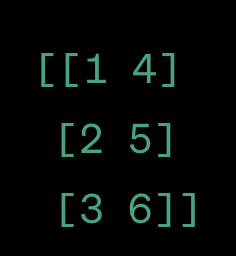
    - 각각 X에 따른 y의 값을 확인할 수 있음.

> ✔️참고) 배열을 **수직**방향으로 결합 : `np.r_[X,y]` - [X, y]이런 형태 ex) [1,2,3,4,5,6]

In [4]:
linreg_data[:5]

array([[0.74908024, 6.33428778],
       [1.90142861, 9.40527849],
       [1.46398788, 8.48372443],
       [1.19731697, 5.60438199],
       [0.31203728, 4.71643995]])

Saving figure generated_data_plot


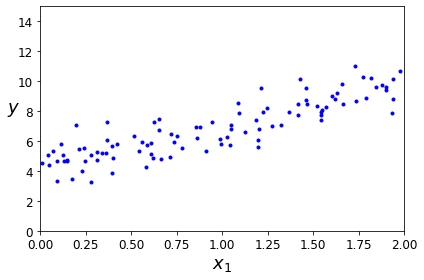

In [5]:
#특성 x1과 레이블 y의 관계를 그려보자. (무작위로 생성한 선형 데이터셋)

plt.plot(X, y, "b.")                         #"b.":파란색 & 점 (산점도 표시)
plt.xlabel("$x_1$", fontsize=18)             #x축 레이블 
plt.ylabel("$y$", rotation=0, fontsize=18)   #x축 레이블
plt.axis([0, 2, 0, 15])                      #x축, y축 구간 지정

save_fig("generated_data_plot")
plt.show()

> 기본적으로 선형 관계를 갖지만 noise로 인해 약간 퍼져있음.

2. 정규방정식을 이용하여 $\hat\theta$ 구하기

- 일반적으로 n개의 특성을 갖는 임의의 크기의 데이터셋 X가 주어졌을 때, $(\mathbf{X}^T \mathbf{X})^{-1}$의 역행렬이 존재하고, 일정 시간 내에 계산이 가능할 때 <br> -> 최적의 파라미터 조합 $\boldsymbol{\hat\theta}$을 정규방정식으로 구할 수 있다.

$$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

In [6]:
X_b = np.c_[np.ones((100,1)), X]   #모든 샘플에 x0=1을 추가 ⬅️ 절편인 θ0을 고려하기 위해

> `np.ones((100,1))` : 모든 요소가 1로 채워진 100개의 행과 1개의 열로 이루어진 배열

> `X_b`: 훈련 세트에 **편향(0번 열(x0)에 1)이 추가**된 배열 (x0=1 추가)


(사이킷런을 사용할 때는 모델이 알아서 추가해줌)

In [7]:
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [8]:
# 위의 코드와 관련된 간단 예시

a = np.ones((4,1))
b = np.random.rand(4,1)

ab_combined = np.c_[a,b]
ab_combined

array([[1.        , 0.7948113 ],
       [1.        , 0.50263709],
       [1.        , 0.57690388],
       [1.        , 0.49251769]])

- Numpy 선형대수 모듈인 `np.linalg` 사용하여 $\boldsymbol{\hat\theta} = [\theta_0, \theta_1]$를 구해보자.

    - `inv()` 함수: 역행렬 계산
    - `dot()` 함수: 행렬 곱셈

$$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

In [9]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

> - theta_best: $\boldsymbol{\hat\theta}$ -> $\boldsymbol{\hat\theta} = [\theta_0, \theta_1]$ 형태
> - 코드 설명:
    - $(\mathbf{X}^T \mathbf{X})^{-1}$ : `inv(X_b.T.dot(X_b))`
    - $\mathbf{X}^T \mathbf{y}$ : `dot(X_b.T).dot(y)`
    
> 사용한 함수: $y=4+3x1+ 가우시안잡음 $

In [10]:
#정규방정식으로 계산된 ^θ=[θ0, θ1] 
theta_best

array([[4.21509616],
       [2.77011339]])

> 기대한 값: $\theta_0$=4, $\theta_1$=3 
<br>➡️ but, 잡음 때문에 정확히 재현x

3. 계산된 $\boldsymbol{\hat\theta}$을 사용해 예측해보자.
- `x1=0` & `x2=2` 일때의 예측값($\hat{y}$) 구하기.
    - -> 이 때는 단순한 **행렬 곱셈에 불과** : 
    $\hat{y} =  \mathbf{X}\, \boldsymbol{\hat{\theta}}$

In [11]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #여기서도 모든 샘플에 x0=1 추가해야 함
X_new_b

array([[1., 0.],
       [1., 2.]])

- 예측값을 구해보자.

In [12]:
#예측값
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

- 그래프로 나타내보자 ➡️ $\theta_0$:절편, $\theta_1$:기울기로 설정

Saving figure linear_model_predictions_plot


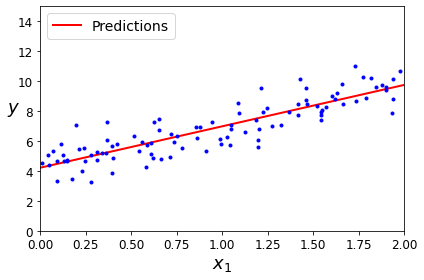

In [13]:
#그래프 (선형 회귀 모델의 예측)

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")  #예측값(θhat)을 이용한 직선

plt.plot(X,y, "b.")  #파란 점의 형태로 예측값 구하기 전 그래프의 산점도  
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.legend(loc="upper left", fontsize=14)  #범례 지정
plt.axis([0, 2, 0, 15])                    #x축 구간:0~2, y축 구간:0~15

save_fig("linear_model_predictions_plot")
plt.show()

#### 사이킷런의 `[LinearRegression] 모델`을 이용하여 선형 회귀 수행

- LinearRegression 클래스의 계산 방식 : **특잇값 분해(SVD)**를 이용 -> 무어-펜로즈의 **유사 역행렬$\mathbf{X}^+$** 활용하여 파라미터 $\hat{\theta}$ 구하기
     - 함수: $\hat{\boldsymbol{\theta}} = \mathbf{X}^+ \mathbf{y}$ 
     
     <br>
     <br>
     
> - 특잇값 분해(SVD): 행렬을 3개의 행렬의 곱(U, $\Sigma$, $\mathbf{V}^T$ )으로 분해

> - 유사 역행렬($\mathbf{X}^+$)
    - 역행렬이 존재하지 않거나 계산이 어려울 때 사용.
    - 유사 역행렬을 구할 때는 일반적으로 SVD 방식을 이용 : 원래 행렬 분해 -> 알고리즘이 대각행렬($\Sigma$)을 구함 -> 낮은 임계값보다 작은 수를 모두 0으로 바꿈 -> 0이 아닌 모든 값을 역수로 치환 -> 이 행렬을 전치
    - 정규방정식보다 효율적

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() #객체 
lin_reg.fit(X,y)             #훈련

LinearRegression()

In [15]:
#절편(θ0), 기울기(θ1)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [16]:
lin_reg.predict(X_new) #X_new: x1=0 & x2=2 

array([[4.21509616],
       [9.75532293]])

> x1=0 & x2=2 일 때 수동으로 계산하여 구했던 예측값(3번에서)과 동일한 $\theta_0$, $\theta_1$ 예측값이 나왔다.

#### 🌎  `fit()`함수 대신 사용할 수 있는 2가지 방법
1. `scipy.linalg.lstsq()` 함수(least squares 최소제곱으로부터 파생)를 **직접 호출** 
-  $\hat{\boldsymbol{\theta}} = \mathbf{X}^+ \mathbf{y}$ 계산
    - (위에서 언급했던 것처럼 LinearRegression 모델이 위의 함수를 기반으로 하기 때문에)
- 이 과정에서 유사 역행렬을 구함

In [17]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

2. Numpy의 `np.linalg.pinv()`함수로 **유사 역행렬**을 구하여 계산하기
    - $\hat{\boldsymbol{\theta}} = \mathbf{X}^+ \mathbf{y}$

In [18]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

## 4.2 경사하강법 (Gradient Descent)
- 특성 수 or 샘플 수가 많을 때는 정규방정식, SVD 방식의 LinearRegression 모델 사용 불가 
    - -> 대신, 경사하강법 사용 (훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합)
- 일반적인 최적화 알고리즘
- 기본 아이디어 : 비용함수를 최소화하기 위하여 **반복해서 파라미터를 조정**

- 진행 방식:<br>(임의의 값)무작위 초기화된 파라미터 벡터 $\theta$에 대해 비용 함수의 현재 gradient(경사도)를 계산 <br> > **gradient가 감소**되는 방향으로 진행(=즉, `비용함수가 최소화`되는 방향) (반복적으로 수정) <br> > `gradient=0`인 지점인 최솟값에 도달
<br>
<br>
- 학습률 & 비용함수의 기울기는 비례 ➡️ 즉, 파라미터가 최솟값에 가까워질 때 -> 학습률이 점진적으로 줄어듦
    - 학습률 (learning rate) - 다음 step으로 이동하는 크기를 조절하는 매개변수 (파라미터 조정 비율)

- 종류 ('배치 크기'에 따라 분류)
    - 배치 경사하강법 : 전체 샘플이 훈련 대상
    - 확률적 경사하강법 : 배치크기=1
    - 미니배치 경사하강법 : 배치크기=2~수백 사이

### 4.2.1) 배치 경사하강법 (Batch Gradient Descent, BGD)
- **전체** 훈련 샘플을 대상으로 훈련 -> 즉, 매 스텝마다(epoch마다) gradient를 계산하여 파라미터 조정
    - epoch : 훈련 세트의 샘플 수에 대하여 한 번 완료하는 단위. (epoch 수 = 반복 횟수)
    <br><br>
- 경사하강법을 구현하기 위해 편도함수를 이용해 조금씩 파라미터를 조정
    - 파라미터 조정 방식 (경사하강법의 스텝을 구하는 식) :  $\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta}^{(\text{previous step})} - \eta\cdot \nabla_\theta \text{MSE}(\boldsymbol{\theta})$<br> ($\eta$ 는 학습률)
        - 스텝의 크기(이동거리) : $\eta\cdot \nabla_\theta \text{MSE}(\boldsymbol{\theta})$

- 비용 함수의 **gradient vector**(=기울기) : $\nabla_\theta \text{MSE}(\boldsymbol{\theta})
 = \frac{2}{m}\, \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})$


In [19]:
#위의 식을 구현

eta = 0.1            #학습률
n_iterations = 1000  #반복 횟수
m = 100              #훈련 샘플 수

theta = np.random.randn(2,1)  #무작위 초기화(표준정규분포를 따르는 임의의 값)된 θ0과 θ1

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #gradient vector
    theta = theta - eta * gradients                 #파라미터 업데이트

In [20]:
theta

array([[4.21509616],
       [2.77011339]])

> 정규방정식으로 계산했을 때와 동일 -> 경사하강법이 완벽히 작동

🔍 학습률에 따라 달라지는 파라미터 학습 과정 비교 그래프 그리기

In [80]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")   #훈련 세트의 산점도
    
    n_iterations = 1000    #반복횟수(epoch) 1000번
    for iteration in range(n_iterations):
        
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
        #파라미터 조정 비율 지정
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        
        #theta_path 리스트에 변화하는 파라미터들을 모두 저장
        if theta_path is not None:
            theta_path.append(theta)
            
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])  #x축:0-2,y축:0-15
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)        

Saving figure gradient_descent_plot


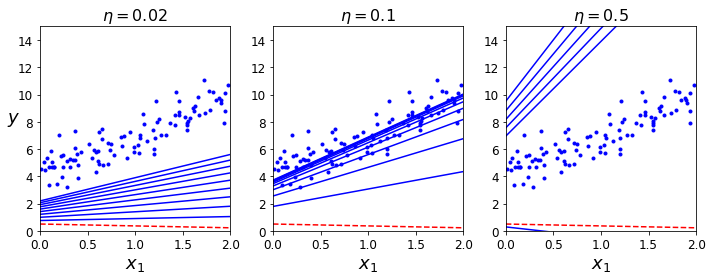

In [81]:
np.random.seed(42)
theta = np.random.randn(2,1) #무작위 초기화한 파라미터

plt.figure(figsize=(10,4))  #figure 사이즈 지정

#1.학습률=0.02인 경우
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)

#2.학습률=0.1인 경우
plt.subplot(132); plot_gradient_descent(theta, eta=0.1)

#3.학습률=0.5인 경우
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

>- 학습률 너무 낮음 (왼) : 최적점에 도달하기까지 시간이 오래 걸림.
>-  학습률이 적당 (가운데) : 반복 몇 번 만에 최적점 도달.
>-  학습률 너무 높음 (오) : 스텝이 너무 크기 때문에 알고리즘이 널뛰어 발산.

> ✏️ `np.random.seed(42)` : Numpy의 라이브러리를 사용하여 난수 생성 시드(seed)를 설정하는 명령. (42는 별 의미 없다고 함. 일반적으로 통용되는 숫자)<br> 
> - seed는 난수를 생성할 때 사용하는 초깃값. 특정 seed를 사용하면 그 seed를 사용할 때마다 **동일한 난수 시퀀스가 생성**. (고정된 난수값이라고 생각하면 될 듯)<br>
     -> 실험의 재현성을 보장하고 코드의 예측 가능성을 높여줌 (즉, 난수를 일관적이게 유지시킴으로써 같은 코드를 여러 번 실행해도 같은 결과값이 나오도록 만들 때 사용)

> 참고) 사이킷런은 배치 하강법에 대한 선형 회귀 모델을 지원하지 않는다고 함. (176쪽에 잘 못 표기)

### 4.2.2) 확률적 경사 하강법 (Stochastic Gradient Descent, SGD)
- 매 스텝에서 샘플 **무작위 선택** > 그 샘플 하나에 대한 gradient 계산
<br>
<br>
- 장점
    - 필요한 데이터⬇️ > 알고리즘 속도 ⬆️ (훈련 세트 큰 경우도 가능)
- 단점
    - "무작위성" -> 알고리즘 불안정 (학습하는 동안 파라미터의 동요가 심함 -> 최적치가 아니거나 발산 <br>
    - but, 불안정으로 인해 지역 최솟값 건너뛸 가능성이 배치 하강법보다 높음 <br>
    - but, 전역 최솟값에 다다르지 못함

➡️ 이러한 딜레마 해결법 : **학습률 점진적 감소 시키기** 
- 시작 시, 학습률 크게(빠른 수렴, 지역 최솟값 넘기도록) --> 학습률을 점차 줄이기 (전역 최솟값에 다다르도록)

- 학습 스케줄 (learning schedule, 매 반복에서 학습률을 결정하는 함수)을 올바르게 설정해야 한다.

📚 간단한 학습 스케줄을 이용한 확률적 경사 하강법을 구현해보자.

In [23]:
n_epochs = 50   #에포크 수(반복 횟수) -> 배치하강법보다 훨씬 적음
t0, t1 = 5, 50  #학습 스케줄 하이퍼파라미터

#학습 스케줄 정의
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) #파라미터 무작위 초기화

#확률적 경사 하강법
for epoch in range(n_epochs):
        #하나의 반복(에포크)에서 샘플 수만큼 되풀이
        for i in range(m):
            random_index = np.random.randint(m)   #범위 내에서 샘플 무작위로 한 개 추출
            xi = X_b[random_index:random_index+1] 
            yi = y[random_index:random_index+1]

            gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 

            eta = learning_schedule(epoch * m + i)

            theta = theta - eta * gradients   #파라미터 업데이트

In [24]:
theta

array([[4.20742938],
       [2.74264448]])

> 적은 에포크 수(50번)만으로 좋은 파라미터 값에 도달

➕ (응용) 위의 코드를 변경하여 **그래프로 표현해보자. (첫 20개의 스텝)**

In [25]:
theta_path_sgd = [] #파라미터 업데이트할 때마다 파라미터 값을 저장하는 리스트

m = len(X_b)
np.random.seed(42)

In [26]:
n_epochs = 50   #에포크 수(반복 횟수) 
t0, t1 = 5, 50  #학습 스케줄 하이퍼파라미터

#학습 스케줄 정의
def learning_schedule(t):
    return t0 / (t + t1)

Saving figure sgd_plot


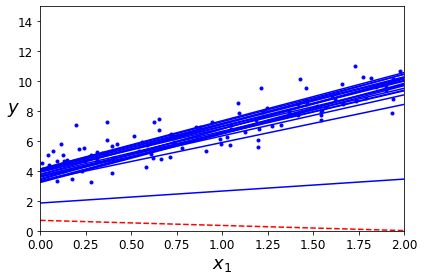

In [31]:
theta = np.random.randn(2,1)  #파라미터 - 무작위 초기화 

#에포크 수만큼(50번) 반복
for epoch in range(n_epochs):
    
    #하나의 에포크에서 샘플 수만큼 알고리즘이 반복 됨
    for i in range(m):
        
        #첫 에포크에서, 20번째 스텝까지 선형 그래프 (직선)
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        #파라미터 업데이트 
        random_index = np.random.randint(m)    #계산할 샘플 확률적(무작위) 선택
        xi = X_b[random_index:random_index+1]  #해당 샘플 적용
        yi = y[random_index:random_index+1]    #타겟 값(예측값) 할당
       
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i) #학습 스케줄 함수 이용하여 학습률 조정
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)           #파라미터 업데이트될 때마다 리스트에 값 추가

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("sgd_plot")
plt.show()

In [28]:
theta

array([[4.21076011],
       [2.74856079]])

#### 사이킷런의 `SGDRegressor` 클래스
- SGD(확률적 경사 하강법)방식을 사용하여 제곱 오차 비용 함수를 최적화

In [34]:
from sklearn.linear_model import SGDRegressor

                    #에포크 최대 1000번, 허용오차=0.001(1e-3), 학습률=0.1, random_state(random seed와 같은 기능)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42) 
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

> `ravel()`: 2차원 배열을 1차원으로 평평하게 만들어주는 함수. 일반적으로 선형 회귀에서 타겟 변수는 1차원 벡터로 제공.

In [37]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

> 정규방정식으로 구한 값과 매우 유사

### 4.2.3) 미니배치 경사 하강법 (Mini-batch Gradient Descent, MGD)
- `미니배치`라 하는 작은 샘플 세트에 대해 gradient 계산
    - **스텝의 크기(보폭) 🟰 미니배치 사이즈**
<br><br>
- 장점
    - 미니배치 크게 어느 정도 크게 하면 > 파라미터 움직임이(파라미터 공간 안에서) SGD보다 덜 불규칙 <br>
        -> SGD보다 최솟값에 더 가까이 도달 (학습 스케줄 잘 활용하면)
    - 배치 경사 하강법보다 빠르게 학습(샘플 크기가 더 작으므로)
    - GPU 통해서 얻는 성능⬆️
    
- 단점
    - SGD에 비해 지역 최솟값에서 벗어날 확률⬇️

📚 미니배치 경사 하강법 구현

In [56]:
theta_path_mgd = []  #업데이트 되는 파라미터 순차적으로 담을 리스트

n_iterations = 50    #에포크 수(반복 횟수): 50번
minibatch_size = 20  #미니배치 크기: 20

np.random.seed(42)
theta = np.random.randn(2,1) #파라미터 무작위 초기화

t0, t1 = 200, 1000   #학습 스케줄 파라미터 

def learning_schedule(t): # t:미니배치의 개수(사이즈 아님)
    return t0 / (t + t1)

In [57]:
t = 0

for epoch in range(n_iterations):
    
    #에포크 넘어갈 때마다 훈련 데이터 섞음
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    #샘플 수만큼 반복 & step:미니배치 크기
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients 
        theta_path_mgd.append(theta)

In [50]:
theta

array([[4.25214635],
       [2.7896408 ]])

#### 📚 세 가지 경사 하강법의 파라미터 학습 경로 비교 그래프 (배치 & 확률적 & 미니배치)
- 파란색 : 배치 (BGD)
- 붉은색 : 확률적 (SGD)
- 초록색 : 미니배치 (MGD)

In [82]:
#각각 파라미터들을 담을 리스트 지정

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

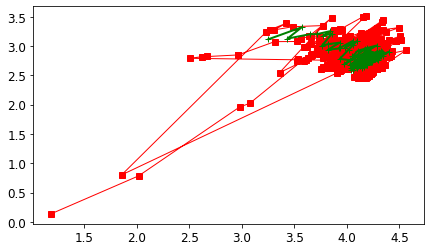

In [83]:
plt.figure(figsize=(7,4))

plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic Gradient Descent")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch Gradient Descent")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch Gradient Descent")

plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$theta_1$", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()